Import all of the libraries

In [ ]:
from fastbook import *
from fastai import *
from ipywidgets import *


Set the Path as the current foler the notebook is in and set the learner as the neural network program created earlier 

In [ ]:
path = Path()
learn_inf = load_learner(path/'export.pkl')

Using IPyidgets creates a uplaod button 

In [ ]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

Views the images saved in position -1 in the list created by button 

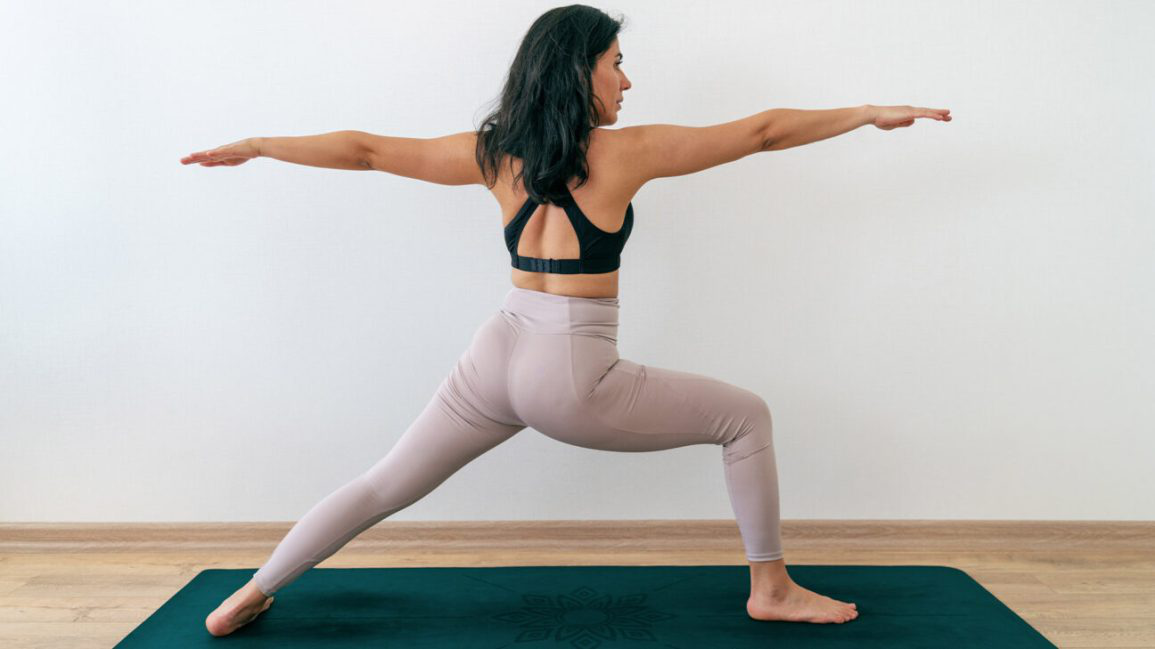

In [ ]:
img = PILImage.create(btn_upload.data[-1])
img

Displays the image in a thumbnail size so that when no matter what sized image upoaded the view is always the same 

In [ ]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Simple text label 

In [ ]:
lbl_pred = widgets.Label()
lbl_pred.value = 'Please Choose an Image'
lbl_pred


Label(value='Please Choose an Image')

Creates an empty button with no function 

In [ ]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

NameError: name 'learn_inf' is not defined

Creates function thats takes the image, displays it and then runs the image through the neural net and finally shws the prediction with a score of its reliability 

In [ ]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

Applies the function to button created earlier 

In [ ]:
btn_run.on_click(on_click_classify)

Puts all of the widgets in a box for easier viewing and use, also when used with Voila only thing sinside the VBo will be shown 

In [ ]:
VBox([widgets.Label('Upload your Yoga Pose!'), 
      btn_upload, btn_run, out_pl, lbl_pred])